In [12]:
import plotly.graph_objects as go

def load_obj(file_path):
    """
    加载 .obj 文件，提取顶点和边信息。
    :param file_path: .obj 文件路径
    :return: 顶点列表和边列表
    """
    vertices = []
    edges = []

    with open(file_path, 'r') as file:
        for line in file:
            parts = line.strip().split()
            if len(parts) < 2:
                continue
            if parts[0] == 'v':  # 处理顶点
                x, y, z = map(float, parts[1:4])
                vertices.append((x, y, z))
            elif parts[0] == 'f' or parts[0] == 'l':  # 处理边
                edge = tuple(map(float, parts[1:3]))
                edges.append((int(edge[0]) - 1, int(edge[1]) - 1))  # 转换为 0-based 索引
    return vertices, edges


def visualize_obj(file_path):
    """
    可视化 .obj 文件中的顶点和边。
    :param file_path: .obj 文件路径
    """
    # 加载顶点和边
    vertices, edges = load_obj(file_path)

    # 提取顶点坐标
    x_coords = [v[0] for v in vertices]
    y_coords = [v[1] for v in vertices]
    z_coords = [v[2] for v in vertices]

    # 创建 3D 点和线条数据
    scatter = go.Scatter3d(
        x=x_coords,
        y=y_coords,
        z=z_coords,
        mode='markers',
        marker=dict(size=5, color='red', opacity=0.8),
        name='Vertices'
    )

    lines = []
    for edge in edges:
        x_line = [vertices[edge[0]][0], vertices[edge[1]][0], None]
        y_line = [vertices[edge[0]][1], vertices[edge[1]][1], None]
        z_line = [vertices[edge[0]][2], vertices[edge[1]][2], None]
        lines.append(go.Scatter3d(
            x=x_line, y=y_line, z=z_line,
            mode='lines',
            line=dict(color='blue', width=2),
            name='Edges'
        ))

    # 创建 3D 图形
    fig = go.Figure(data=[scatter] + lines)
    fig.update_layout(
        scene=dict(
            xaxis_title='X',
            yaxis_title='Y',
            zaxis_title='Z',
        ),
        title="OBJ File Visualization",
        margin=dict(l=0, r=0, t=30, b=0)
    )

    # 显示图形
    fig.show()


In [13]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
def visualize_wireframe(file_path):
    """
    可视化 .obj 文件中的线框。
    :param file_path: .obj 文件路径
    """
    # 加载数据
    vertices, edges = load_obj(file_path)

    # 提取坐标
    x_coords = [v[0] for v in vertices]
    y_coords = [v[1] for v in vertices]
    z_coords = [v[2] for v in vertices]

    # 创建图形
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # 绘制顶点
    ax.scatter(x_coords, y_coords, z_coords, color='red', s=10, label='Vertices')

    # 绘制边
    for edge in edges:
        x_line = [vertices[edge[0]][0], vertices[edge[1]][0]]
        y_line = [vertices[edge[0]][1], vertices[edge[1]][1]]
        z_line = [vertices[edge[0]][2], vertices[edge[1]][2]]
        ax.plot(x_line, y_line, z_line, color='blue', linewidth=1)

    # 设置视图参数
    ax.set_title("Wireframe Visualization")
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")
    ax.legend()

    # 显示图形
    plt.show()

In [16]:
import open3d as o3d
def visualize_ply(pts_file):
    # 读取 .ply 文件
    pcd = o3d.io.read_point_cloud(pts_file)
    
    # 可视化点云
    o3d.visualization.draw_geometries([pcd],
                                      window_name="PLY Point Cloud",
                                      width=800, height=600,
                                      left=50, top=50,
                                      point_show_normal=False,  # 是否显示法线
                                      mesh_show_wireframe=False,  # 是否显示网格线
                                      mesh_show_back_face=False)

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


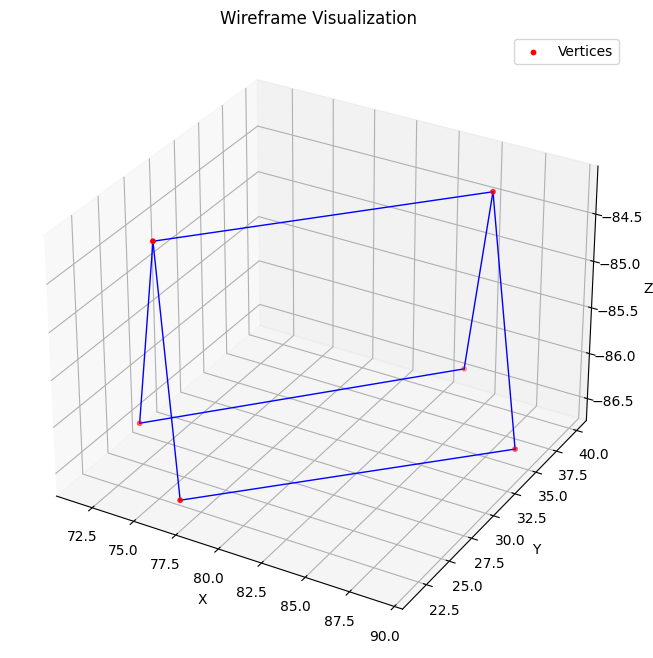

[Open3D WARNING] GLFW Error: X11: The DISPLAY environment variable is missing
[Open3D WARNING] Failed to initialize GLFW
[Open3D WARNING] [DrawGeometries] Failed creating OpenGL window.


In [ ]:
file_path = "/data/haoran/Point2Roof/output/test_xitaizi/test/roof1.obj"  # 替换为你的 .obj 文件路径
visualize_wireframe(file_path)

最小值: 5.598458301392384e-06
最大值: 0.7738348245620728
均值: 0.017680110409855843
标准差: 0.07374861091375351
tensor(10)


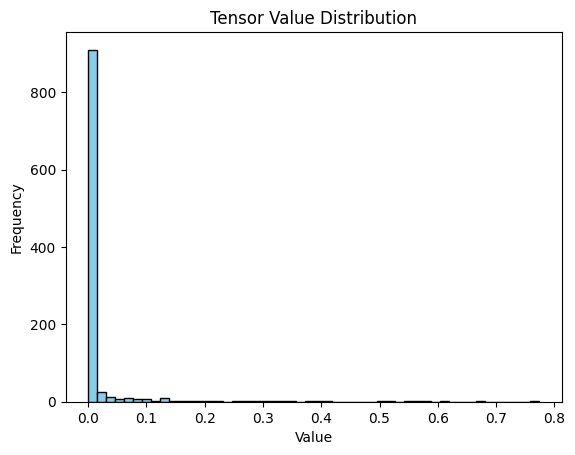

In [4]:
import pickle

# 打开文件并加载变量
with open('pts_score.pkl', 'rb') as file:
    loaded_data = pickle.load(file)

import torch
import matplotlib.pyplot as plt

# 将 Tensor 转为 CPU 上的数据，方便统计
loaded_data = loaded_data.cpu()

# 将 tensor 数据展平为一维
flattened_data = loaded_data.flatten()

# 使用 torch 统计数值的基本信息
min_val = flattened_data.min().item()
max_val = flattened_data.max().item()
mean_val = flattened_data.mean().item()
std_val = flattened_data.std().item()

print(f"最小值: {min_val}")
print(f"最大值: {max_val}")
print(f"均值: {mean_val}")
print(f"标准差: {std_val}")
print(sum(loaded_data[0] > 0.5))
# 使用 matplotlib 画出直方图来展示分布
plt.hist(flattened_data.numpy(), bins=50, color='skyblue', edgecolor='black')
plt.title('Tensor Value Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

In [9]:
import pickle

# 打开文件并加载变量
with open('pts_cluster.pkl', 'rb') as file:
    loaded_data = pickle.load(file)

import torch
import matplotlib.pyplot as plt

# 将 Tensor 转为 CPU 上的数据，方便统计
loaded_data = loaded_data.cpu()
print(loaded_data)
print(loaded_data.shape)
print( torch.unique(loaded_data).tolist())

tensor([[[-10., -10., -10.],
         [-10., -10., -10.],
         [-10., -10., -10.],
         ...,
         [-10., -10., -10.],
         [-10., -10., -10.],
         [-10., -10., -10.]]])
torch.Size([1, 1024, 3])
[-10.0]


点云数据已加载


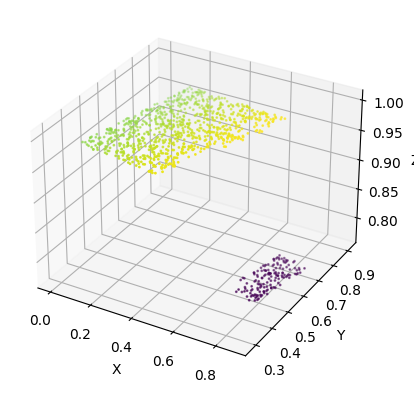

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def visualize_point_cloud(points):
    """
    可视化点云数据。
    
    参数:
        points (np.ndarray): 点云数据，形状为 (N, 3)，每一行表示一个三维坐标 (x, y, z)。
    """
    # 创建一个三维坐标轴
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    # 提取x, y, z坐标
    x = points[:, 0]
    y = points[:, 1]
    z = points[:, 2]
    
    # 绘制3D散点图
    ax.scatter(x, y, z, c=z, cmap='viridis', s=1)  # c=z 设置颜色映射，s=1 设置点的大小
    
    # 设置坐标轴标签
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    
    # 显示图形
    plt.show()

# 加载保存的点云数据
loaded_points = np.load('point_cloud.npy')
print("点云数据已加载")

# 可视化点云
visualize_point_cloud(loaded_points)